<a href="https://colab.research.google.com/github/highlevelcoding/Flight-Cancellation-Analysis-and-Prediction/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset loaded successfully!

Dataset Preview:
   Flight ID    Airline  Flight_Distance Origin_Airport Destination_Airport  \
0    7319483  Airline D              475      Airport 3           Airport 2   
1    4791965  Airline E              538      Airport 5           Airport 4   
2    2991718  Airline C              565      Airport 1           Airport 2   
3    4220106  Airline E              658      Airport 5           Airport 3   
4    2263008  Airline E              566      Airport 2           Airport 2   

   Scheduled_Departure_Time  Day_of_Week  Month Airplane_Type  Weather_Score  \
0                         4            6      1        Type C       0.225122   
1                        12            1      6        Type B       0.060346   
2                        17            3      9        Type C       0.093920   
3                         1            1      8        Type B       0.656750   
4                        19            7     12        Type E       0.505211  

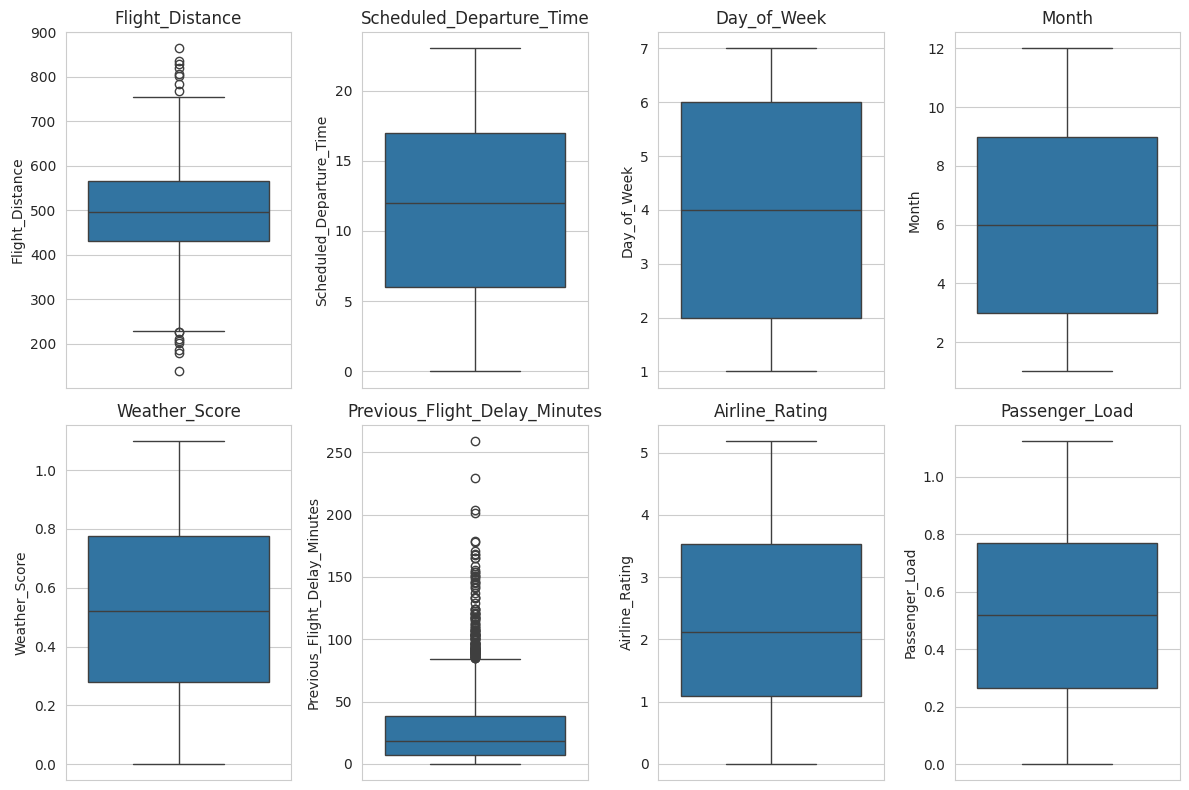


Outliers (|Z-score| > 3):
Flight_Distance: 10 outliers
Scheduled_Departure_Time: 0 outliers
Day_of_Week: 0 outliers
Month: 0 outliers
Weather_Score: 0 outliers
Previous_Flight_Delay_Minutes: 51 outliers
Airline_Rating: 0 outliers
Passenger_Load: 0 outliers

Capped Passenger_Load at 1
Rounded Previous_Flight_Delay_Minutes to integers
Capped Flight_Distance at Z-score ±3
Capped Scheduled_Departure_Time at Z-score ±3
Capped Day_of_Week at Z-score ±3
Capped Month at Z-score ±3
Capped Weather_Score at Z-score ±3
Capped Previous_Flight_Delay_Minutes at Z-score ±3
Capped Airline_Rating at Z-score ±3
Capped Passenger_Load at Z-score ±3

Data Types Before:
Flight ID                          int64
Airline                           object
Flight_Distance                  float64
Origin_Airport                    object
Destination_Airport               object
Scheduled_Departure_Time           int64
Day_of_Week                        int64
Month                              int64
Airplane_Type  

In [4]:
# %% [markdown]
# # Task 1: Data Cleaning & Preprocessing Pipeline Development
# **Project**: Flight Cancellation Analysis and Prediction
# **Author**: Venky
# **Objective**: Clean and preprocess the Flyzy Flight Cancellation dataset by handling missing values, duplicates, outliers, and data types, then save as a .csv file.
# **Dataset**: Flyzy Flight Cancellation.xlsx
# **Submission**: Save cleaned dataset as `venky_data_cleaned_preprocessed.csv` and submit code via Google Drive or GitHub.

# %% [markdown]
# ## Step 1: Load and Validate Dataset
# Load the dataset, verify column names, and perform initial validation.

# %% [code]
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Set plot style
sns.set_style("whitegrid")

# Load dataset
try:
    df = pd.read_excel('/content/drive/MyDrive/Flyzy Flight Cancellation.xlsx')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'Flyzy Flight Cancellation.xlsx' not found. Please ensure the file is in the working directory.")
    raise

# Preview dataset
print("\nDataset Preview:")
print(df.head())

# Check column names
print("\nColumn Names:")
print(df.columns.tolist())

# Check basic info
print("\nDataset Info:")
print(df.info())

# %% [markdown]
# ## Step 2: Handle Missing Values
# Check for missing values using `.isnull().sum()` and decide on a handling strategy.

# %% [code]
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Strategy: Fill numerical columns with median, categorical with mode
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].median(), inplace=True)
            print(f"Filled missing values in {column} with median: {df[column].median()}")
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)
            print(f"Filled missing values in {column} with mode: {df[column].mode()[0]}")

# Verify no missing values remain
print("\nMissing Values After Handling:")
print(df.isnull().sum())

# %% [markdown]
# ## Step 3: Handle Duplicates
# Check for and remove duplicate rows to ensure data integrity.

# %% [code]
# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()
print("Duplicate Rows After Removal:", df.duplicated().sum())

# %% [markdown]
# ## Step 4: Drop Unnecessary Columns
# Drop `Flight_ID` if it exists (unique identifier, not predictive).

# %% [code]
# Check if 'Flight_ID' exists and drop it
flight_id_variants = ['Flight_ID', 'flight_id', 'FlightID', 'Flight_Id']
for col in flight_id_variants:
    if col in df.columns:
        df = df.drop(col, axis=1)
        print(f"Removed column: {col}")
        break
else:
    print("\nNo 'Flight_ID' column found in dataset.")

# %% [markdown]
# ## Step 5: Check and Handle Outliers
# Use boxplots and Z-scores to identify outliers in numerical columns, then decide on treatment.

# %% [code]
# Define numerical columns
numerical_cols = ['Flight_Distance', 'Scheduled_Departure_Time', 'Day_of_Week', 'Month',
                  'Weather_Score', 'Previous_Flight_Delay_Minutes', 'Airline_Rating', 'Passenger_Load']

# Plot boxplots for numerical columns
plt.figure(figsize=(12, 8))
for i, name in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[name])
    plt.title(name)
plt.tight_layout()
plt.show()

# Check Z-scores for outliers (|Z| > 3)
print("\nOutliers (|Z-score| > 3):")
for col in numerical_cols:
    try:
        z_scores = zscore(df[col])
        outliers = df[abs(z_scores) > 3]
        print(f"{col}: {len(outliers)} outliers")
    except KeyError:
        print(f"Column '{col}' not found in dataset.")
        continue

# Handle specific issues
# - Cap Passenger_Load at 1
if 'Passenger_Load' in df.columns:
    df['Passenger_Load'] = df['Passenger_Load'].clip(upper=1)
    print("\nCapped Passenger_Load at 1")
else:
    print("\nWarning: 'Passenger_Load' column not found.")

# - Round Previous_Flight_Delay_Minutes to integers
if 'Previous_Flight_Delay_Minutes' in df.columns:
    df['Previous_Flight_Delay_Minutes'] = df['Previous_Flight_Delay_Minutes'].round()
    print("Rounded Previous_Flight_Delay_Minutes to integers")
else:
    print("Warning: 'Previous_Flight_Delay_Minutes' column not found.")

# - Cap numerical columns at Z-score ±3
for col in numerical_cols:
    if col in df.columns:
        z_scores = zscore(df[col])
        upper_bound = df[col].mean() + 3 * df[col].std()
        lower_bound = df[col].mean() - 3 * df[col].std()
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"Capped {col} at Z-score ±3")
    else:
        print(f"Skipping {col}: Column not found.")

# %% [markdown]
# ## Step 6: Verify and Correct Data Types
# Ensure each column has the appropriate data type.

# %% [code]
# Check data types
print("\nData Types Before:")
print(df.dtypes)

# Define expected data types
expected_dtypes = {
    'Airline': 'object',
    'Flight_Distance': 'float64',
    'Origin_Airport': 'object',
    'Destination_Airport': 'object',
    'Scheduled_Departure_Time': 'int64',
    'Day_of_Week': 'int64',
    'Month': 'int64',
    'Airplane_Type': 'object',
    'Weather_Score': 'float64',
    'Previous_Flight_Delay_Minutes': 'int64',
    'Airline_Rating': 'float64',
    'Passenger_Load': 'float64',
    'Flight_Cancelled': 'int64'
}

# Convert data types
for col, dtype in expected_dtypes.items():
    if col in df.columns:
        try:
            df[col] = df[col].astype(dtype)
        except (ValueError, TypeError) as e:
            print(f"Warning: Could not convert {col} to {dtype}. Error: {e}")
    else:
        print(f"Warning: Column '{col}' not found in dataset.")

# Verify data types
print("\nData Types After:")
print(df.dtypes)

# %% [markdown]
# ## Step 7: Save Cleaned Dataset
# Save the cleaned dataset as `venky_data_cleaned_preprocessed.csv`.

# %% [code]
# Save cleaned dataset
try:
    df.to_csv('venky_data_cleaned_preprocessed.csv', index=False)
    print("\nCleaned dataset saved as 'venky_data_cleaned_preprocessed.csv'")
except Exception as e:
    print(f"\nError saving file: {e}")

# Preview final dataset
print("\nFinal Dataset Preview:")
print(df.head())

# %% [markdown]
# ## Submission Instructions
# - **File**: `venky_data_cleaned_preprocessed.csv`
# - **Code**: This Jupyter Notebook (`Task1_Data_Cleaning.ipynb`)
# - **Option 1 (Google Drive)**:
#   1. Upload `venky_data_cleaned_preprocessed.csv` and `Task1_Data_Cleaning.ipynb` to Google Drive.
#   2. Set sharing to "Anyone with the link can view."
#   3. Submit the shareable link on the submission platform.
# - **Option 2 (GitHub)**:
#   ```bash
#   git init

#   git add Task1_Data_Cleaning.ipynb venky_data_cleaned_preprocessed.csv
#   git commit -m "Task 1: Data Cleaning and Preprocessing"
#   git remote add origin <your-repo-url>
#   git push -u origin main
#   ```
#   Submit the public GitHub repository link on the platform.